# CONCTRETE COMPRESSIVE STRENGTH PREDICTION USING DIFFERENT MACHINE LEARNING MODELS

## 1. Domain Introduction:
Concrete compressive strength is a critical parameter in civil engineering, determining the load-bearing capacity and durability of concrete structures. The prediction of compressive strength is essential for ensuring the safety and reliability of buildings, bridges, and other infrastructures. This process involves understanding the relationships between the mix components, curing conditions, and age of the concrete.

### 1.1 Key Factors affecting compressive strength of concrete are:

1) Cement Content: The amount of cement in the mix significantly influences the compressive strength. Higher cement content    typically increases strength.

2) Water-Cement Ratio: The ratio of water to cement affects the hydration process and thus the strength. A lower ratio        generally leads to higher strength.

3) Aggregate Characteristics: The size, shape, and type of aggregates (coarse and fine) play a crucial role in the            concrete's strength.

4) Admixtures: Chemical additives (e.g., superplasticizers, accelerators) can enhance workability and strength.

5) Curing Conditions: Temperature and humidity during curing affect the hydration process and final strength. Proper curing    ensures optimal strength development.

6) Age of Concrete: Strength increases with age as hydration progresses, typically measured at 7, 28, and 90 days.

7) Mix Proportion: The relative proportions of cement, water, aggregates, and admixtures define the concrete's properties.

## 2. Problem Statement

1) Preparing Complete data analysis report on concrete data

2) Create a machine learning model which can predict the future strength of a concrete mix, based on its constituents’ composition and also the age of the mix.

## 3. Data Collection
The dataset provided pertains to various factors influencing the compressive strength of concrete, an essential element in civil engineering. This data collection was initially assembled by Professor I-Cheng Yeh from the Department of Information Management at Chung-Hua University in Hsin Chu, Taiwan and was generously donated on August 3, 2007.

## 4. Data Preprocessing
Data preprocessing mainly consists of:

4.1 Data Cleaning

4.2 Data Intregration

4.3 Data Reduction

4.4 Data Transformation

4.5 Data Discretization

![Data-Preprocessing_updated.png](attachment:Data-Preprocessing_updated.png)
Source: AL ML Analytics

### 4.1 Data Cleaning

Real-world data tend to be incomplete, noisy, and inconsistent. Data cleaning
attempt to fill in missing values, smooth out noise
while identifying outliers, and correct inconsistencies in the data.

#### Processes in Data Cleaning
#### 4.1.1 Finding and treating Missing value
#### 4.1.2 Identifying outliers and treating
#### 4.1.3 Indentifying duplicates value and treating them


In [ ]:
#importing required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading Datasets
df = pd.read_csv('Data\concrete.csv')

In [ ]:
df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [ ]:
df.shape

(1030, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


#### 4.1.1 Finding missing value and treating them

In [ ]:
#finding missing/null values
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [ ]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


#### 4.1.2 Finding outliers and treating them

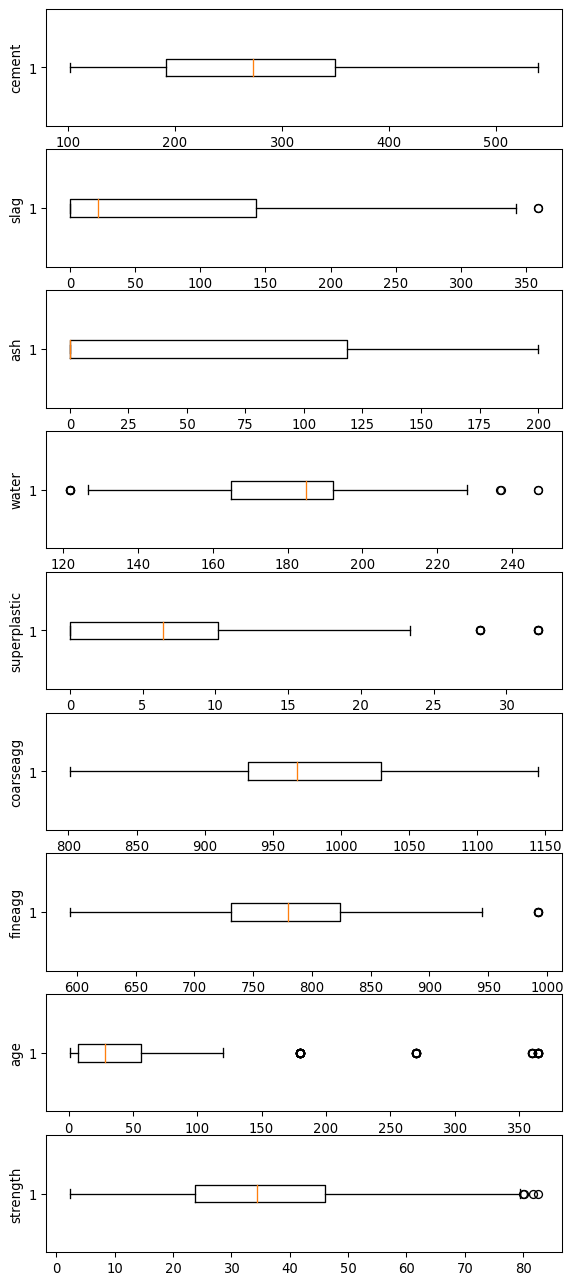

In [ ]:
#identifying outliers and treating them
#here to identify outliers we use Box Plots
fig, axs = plt.subplots(9,1,dpi=95, figsize=(7,17))
i = 0
for col in df.columns:
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

Note: from above box plots we can see age,superplastici,slag,fine aggregate and water shows some outliers. In next step we will treat those outliers

In [ ]:
df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [ ]:
#treating outliers
# Identify the quartiles
q1, q3 = np.percentile(df['age'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

# Identify the quartile
q1, q3 = np.percentile(clean_data['slag'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['slag'] >= lower_bound) & (clean_data['slag'] <= upper_bound)]

# Identify the quartile
q1, q3 = np.percentile(clean_data['water'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['water'] >= lower_bound) & (clean_data['water'] <= upper_bound)]

# Identify the quartile
q1, q3 = np.percentile(clean_data['superplastic'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (0.75 * iqr)
upper_bound = q3 + (0.75 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['superplastic'] >= lower_bound) & (clean_data['superplastic'] <= upper_bound)]
# Identify the quartile
q1, q3 = np.percentile(clean_data['fineagg'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (0.75 * iqr)
upper_bound = q3 + (0.75 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['fineagg'] >= lower_bound) & (clean_data['fineagg'] <= upper_bound)]

df = clean_data



In [ ]:
df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
10,198.6,132.4,0.0,192.0,0.0,978.4,825.5,90,38.07
11,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,28.02
16,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,90,39.36
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


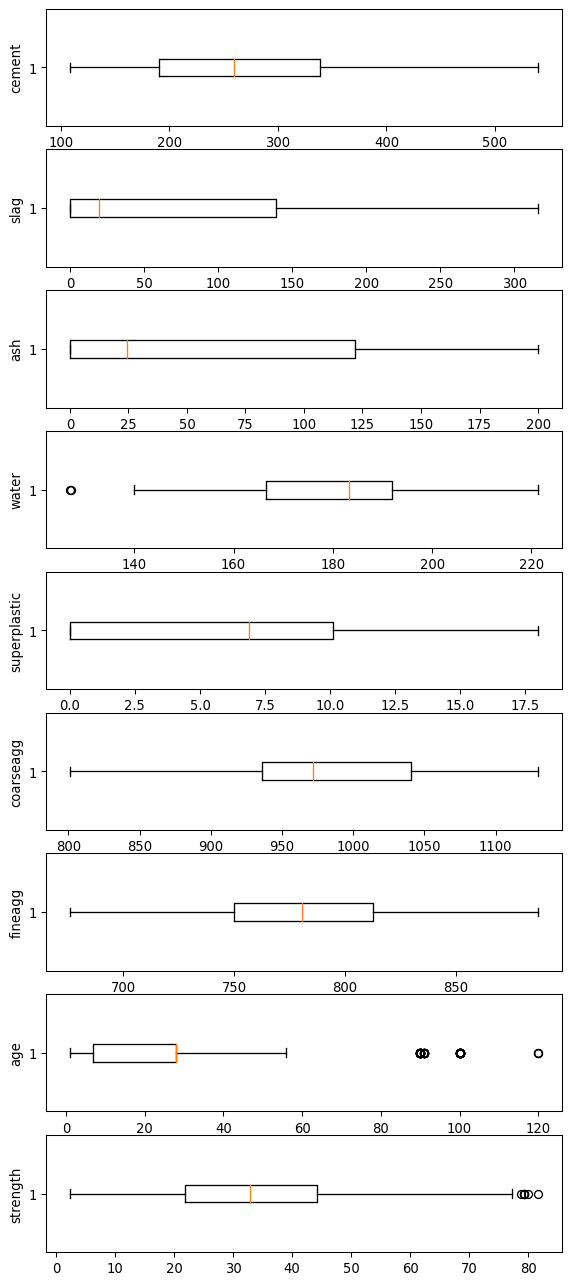

In [ ]:
#box plot after treating outliers
fig, axs = plt.subplots(9,1,dpi=95, figsize=(7,17))
i = 0
for col in df.columns:
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

### 4.2 Data Integration

There is no necessity for data integration because our data are already structured and assembled in a single csv file

## 5 Exploratory Data Analysis(EDA)
 Exploratory Data Analysis is preformed to understand better insights to the given data. It helps to understand patterns in data distribution, relation between different variables, statistical summary. Here, different analysis methods are used.

<Axes: >

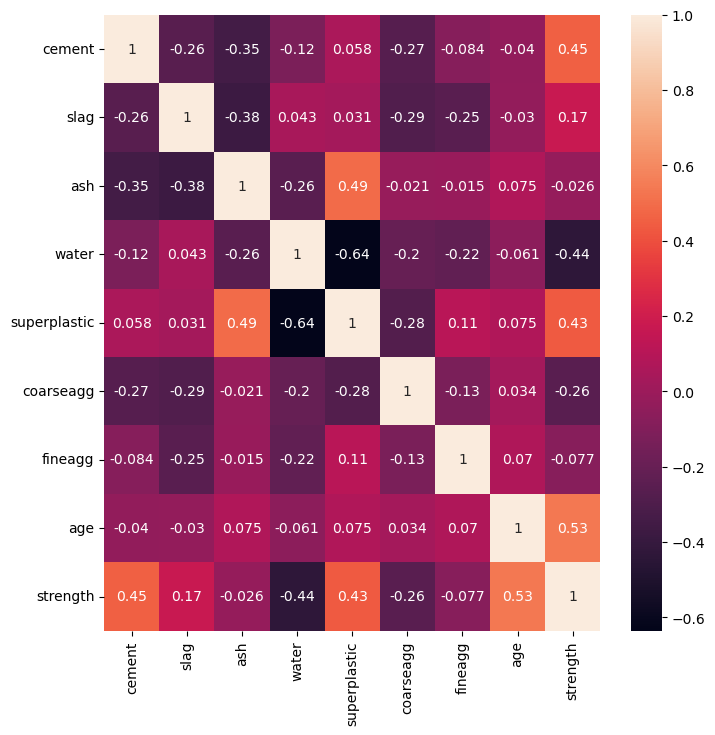

In [ ]:
#plotting heat map
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)

Key Observations

1. Cement vs. Strength: There is a moderately positive correlation (0.45), indicating that an increase in cement content is    associated with an increase in strength.
2. Age vs. Strength: There is a strong positive correlation (0.53), suggesting that as the age increases, the strength also    increases.
3. Water vs. Strength: There is a moderately negative correlation (-0.44), indicating that an increase in water content is    associated with a decrease in strength.
4. Superplastic vs. Strength: There is a moderate positive correlation (0.43), suggesting that superplasticizers positively    impact strength.
5. Ash vs. Superplastic: There is a moderate positive correlation (0.49), indicating that ash content is positively            correlated with the use of superplastic.
6. Water vs. Superplastic: There is a strong negative correlation (-0.64), suggesting that as the water content increases,    the use of superplastic decreases.
7. Ash vs. Cement: There is a moderate negative correlation (-0.35).
8. Slag vs. Cement: There is a slight negative correlation (-0.26).
9. Coarseagg vs. Cement: There is a moderate negative correlation (-0.27).

In [ ]:

# correlation
corr=df.corr()
corr['strength'].sort_values(ascending = False)

strength        1.000000
age             0.534297
cement          0.454634
superplastic    0.434773
slag            0.170508
ash            -0.025738
fineagg        -0.076665
coarseagg      -0.256670
water          -0.436594
Name: strength, dtype: float64

Correlation with Strength

1. Strength (self-correlation): The correlation of strength with itself is 1.000000
2. Age (0.534297): There is a strong positive correlation with strength. This suggests that as the material ages, its          strength tends to increase.
3. Cement (0.454634): There is a moderately strong positive correlation with strength. This indicates that higher cement      content generally leads to increased strength.
4. Superplastic (0.434773): There is a moderately strong positive correlation with strength. This suggests that the use of    superplastic enhances the strength of the material.
5. Slag (0.170508): There is a weak positive correlation with strength. This indicates a slight positive impact of slag on    the material's strength.
6. Ash (-0.025738): There is a very weak negative correlation with strength, indicating that ash has a negligible effect on    the strength.
7. Fineagg (fine aggregate) (-0.076665): There is a weak negative correlation with strength. This suggests that an increase    in fine aggregate content slightly decreases the strength.
8. Coarseagg (coarse aggregate) (-0.256670): There is a moderate negative correlation with strength. This indicates that      higher coarse aggregate content is associated with a decrease in strength.
9. Water (-0.436594): There is a moderately strong negative correlation with strength. This suggests that higher water        content tends to decrease the material's strength.

Summary

1. Positive Correlations:

        Age: Older material tends to be stronger.
        
        Cement: More cement content tends to increase strength.
        
        Superplastic: Their use enhances strength.
        
        Slag: Slight positive impact on strength.

2. Negative Correlations:

        Water: Higher water content decreases strength.
        
        Coarse Aggregate: More coarse aggregate content reduces strength.
        
        Fine Aggregate: Slight decrease in strength with more fine aggregate.
        
        Ash: Negligible effect, but slightly negative.

These correlations provide insights into how various factors influence the strength of the material, which can be crucial for optimizing concrete mix designs for desired properties.

Variables with Low Correlation to Strength

From the provided correlation values, the following variables have low correlation with strength:

1. Ash (-0.025738): This variable has a very weak negative correlation with strength, indicating it has little to no impact    on the strength of the material. It is a strong candidate for removal.
2. Fine Aggregate (fineagg) (-0.076665): This variable has a weak negative correlation with strength, suggesting a minor impact on strength. It could be considered for removal.

Variables with Weak to Moderate Correlation to Strength

1. Slag (0.170508): This variable has a weak positive correlation with strength. Although it has a small positive impact,      it might be considered for removal if simplification of the model is a priority and the impact is not significant.
5. Coarse Aggregate (coarseagg) (-0.256670): This variable has a moderate negative correlation with strength. Its impact is    more significant than that of ash and fine aggregate.

 Considerations from the Heatmap

The heatmap provides further insights into the relationships between variables:

1. Water vs. Strength (-0.44): Moderately strong negative correlation, suggesting that this variable is important for          understanding strength and should be retained.
2. Superplastic vs. Strength (0.43): Moderately strong positive correlation, indicating its importance in determining          strength.
3. Age vs. Strength (0.53): Strong positive correlation, making it a crucial variable to retain.
4. Cement vs. Strength (0.45): Moderately strong positive correlation, indicating its significance in predicting strength.

Summary

Based on both the heatmap and correlation data, the following variables are suitable candidates for removal due to their low correlation with strength:

1. Ash: Negligible correlation with strength.
2. Fine Aggregate (fineagg): Weak correlation with strength.

In [ ]:
# Dropping the specified columns from the DataFrame
df.drop(["ash"], axis=1, inplace=True)
df.drop(["fineagg"], axis=1, inplace=True)

# Printing the updated DataFrame
df.head()

,cement,slag,water,superplastic,coarseagg,age,strength
0,540.0,0.0,162.0,2.5,1040.0,28,79.99
1,540.0,0.0,162.0,2.5,1055.0,28,61.89
10,198.6,132.4,192.0,0.0,978.4,90,38.07
11,198.6,132.4,192.0,0.0,978.4,28,28.02
16,139.6,209.4,192.0,0.0,1047.0,90,39.36


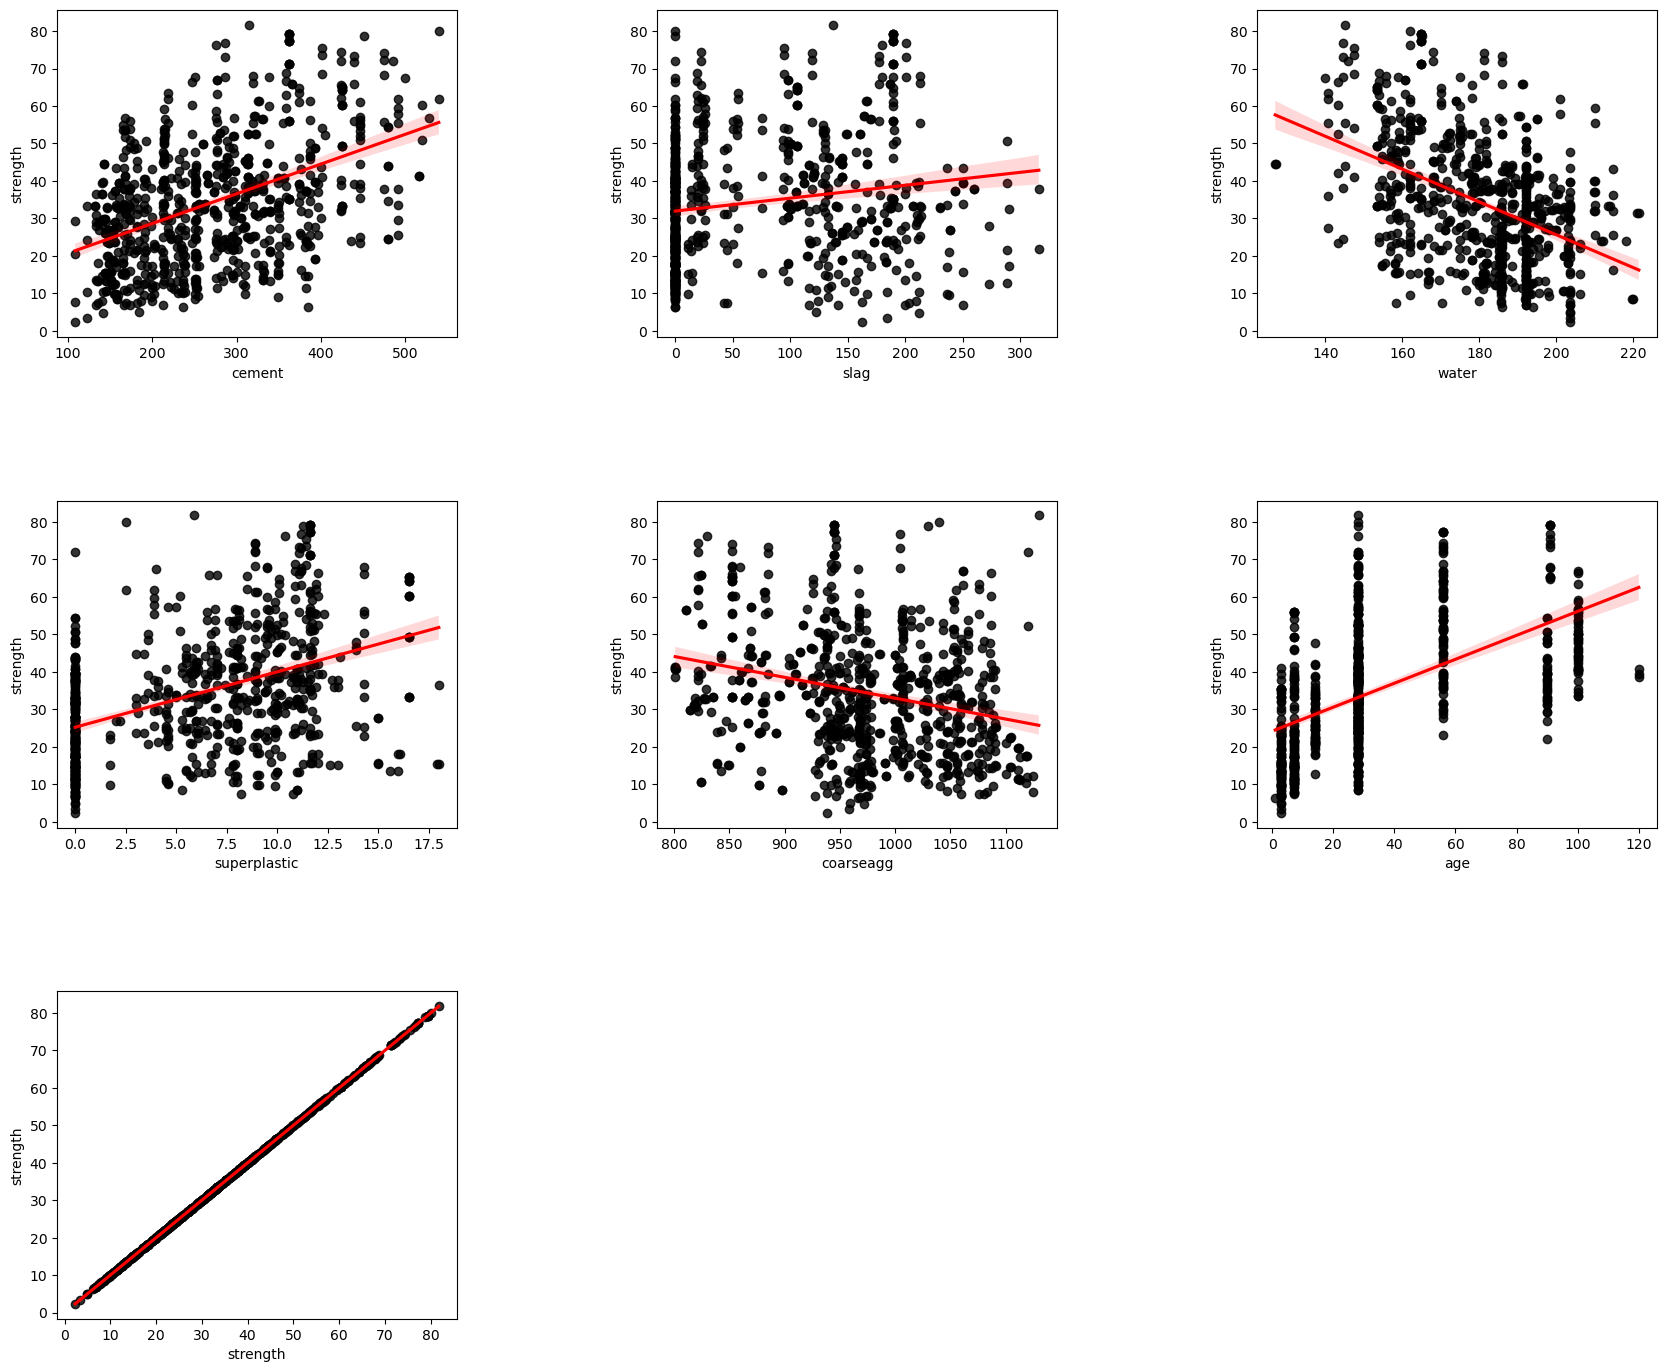

In [ ]:
#plotting scatter plot
# Creating the figure with a size of 20 inches by 40 inches
fig = plt.figure(figsize=(20, 40))

# Adjusting the spacing between subplots
plt.subplots_adjust(left=0.2, bottom=0.2, right=1, top=2, wspace=0.5, hspace=0.5)

# Iterate over the columns of the DataFrame
for i, col in enumerate(df.columns):
    # Create a new subplot
    plt.subplot(15, 3, i + 1)

    # Creating a regression plot in the current subplot
    # with x as the current column and y as "concrete_compressive_strength"
    # using data from the DataFrame df
    # Customizing the scatter points to have a color of "green"
    # and the regression line to have a color of "red"
    sns.regplot(x=col, y="strength", data=df, scatter_kws={"color": "black"}, line_kws={"color": "red"})

# Displaying the figure
plt.show()

The scatter plots provided show the relationship between the dependent variable (strength) and various independent variables (cement, slag, water, superplastic, coarse aggregate, age) in a dataset. Each plot includes a regression line (in red) which indicates the trend of the relationship between the variables.
Scatter Plot Explanations

1. Cement vs. Strength

        Description: This plot shows the relationship between cement content and strength.
        
        Trend: There is a positive correlation, as indicated by the upward slope of the regression line. This suggests that                an increase in cement content generally leads to an increase in strength.
        
        Scatter: The data points show a positive trend but with some variability.

2. Slag vs. Strength

        Description: This plot shows the relationship between slag content and strength.
        
        Trend: The regression line shows a slight positive slope, indicating a weak positive correlation between slag                      content and strength.
        
        Scatter: The data points are widely scattered, indicating significant variability and a weak overall trend.

3. Water vs. Strength

        Description: This plot shows the relationship between water content and strength.
        
        Trend: The regression line has a negative slope, indicating a negative correlation. Higher water content is                        associated with lower strength.
        
        Scatter: The data points show a general downward trend but with considerable scatter, indicating variability in the                  relationship.

4. Superplastic vs. Strength

        Description: This plot shows the relationship between superplasticizer content and strength.
        
        Trend: The regression line has a positive slope, indicating a positive correlation. Increasing superplasticizer                    content is associated with increased strength.
        
        Scatter: The data points show a positive trend but with substantial scatter, indicating variability.

5. Coarse Aggregate (coarseagg) vs. Strength

        Description: This plot shows the relationship between coarse aggregate content and strength.
        
        Trend: The regression line has a negative slope, indicating a negative correlation. Higher coarse aggregate content                is associated with lower strength.
        
        Scatter: The data points are quite scattered around the regression line, showing variability in the relationship.

6. Age vs. Strength

        Description: This plot shows the relationship between age and strength.
        
        Trend: The regression line has a positive slope, indicating a positive correlation. As the material ages, its                      strength tends to increase.
        
        Scatter: The data points show a clear positive trend with some scatter, suggesting that age is a good predictor of                  strength with some variability.

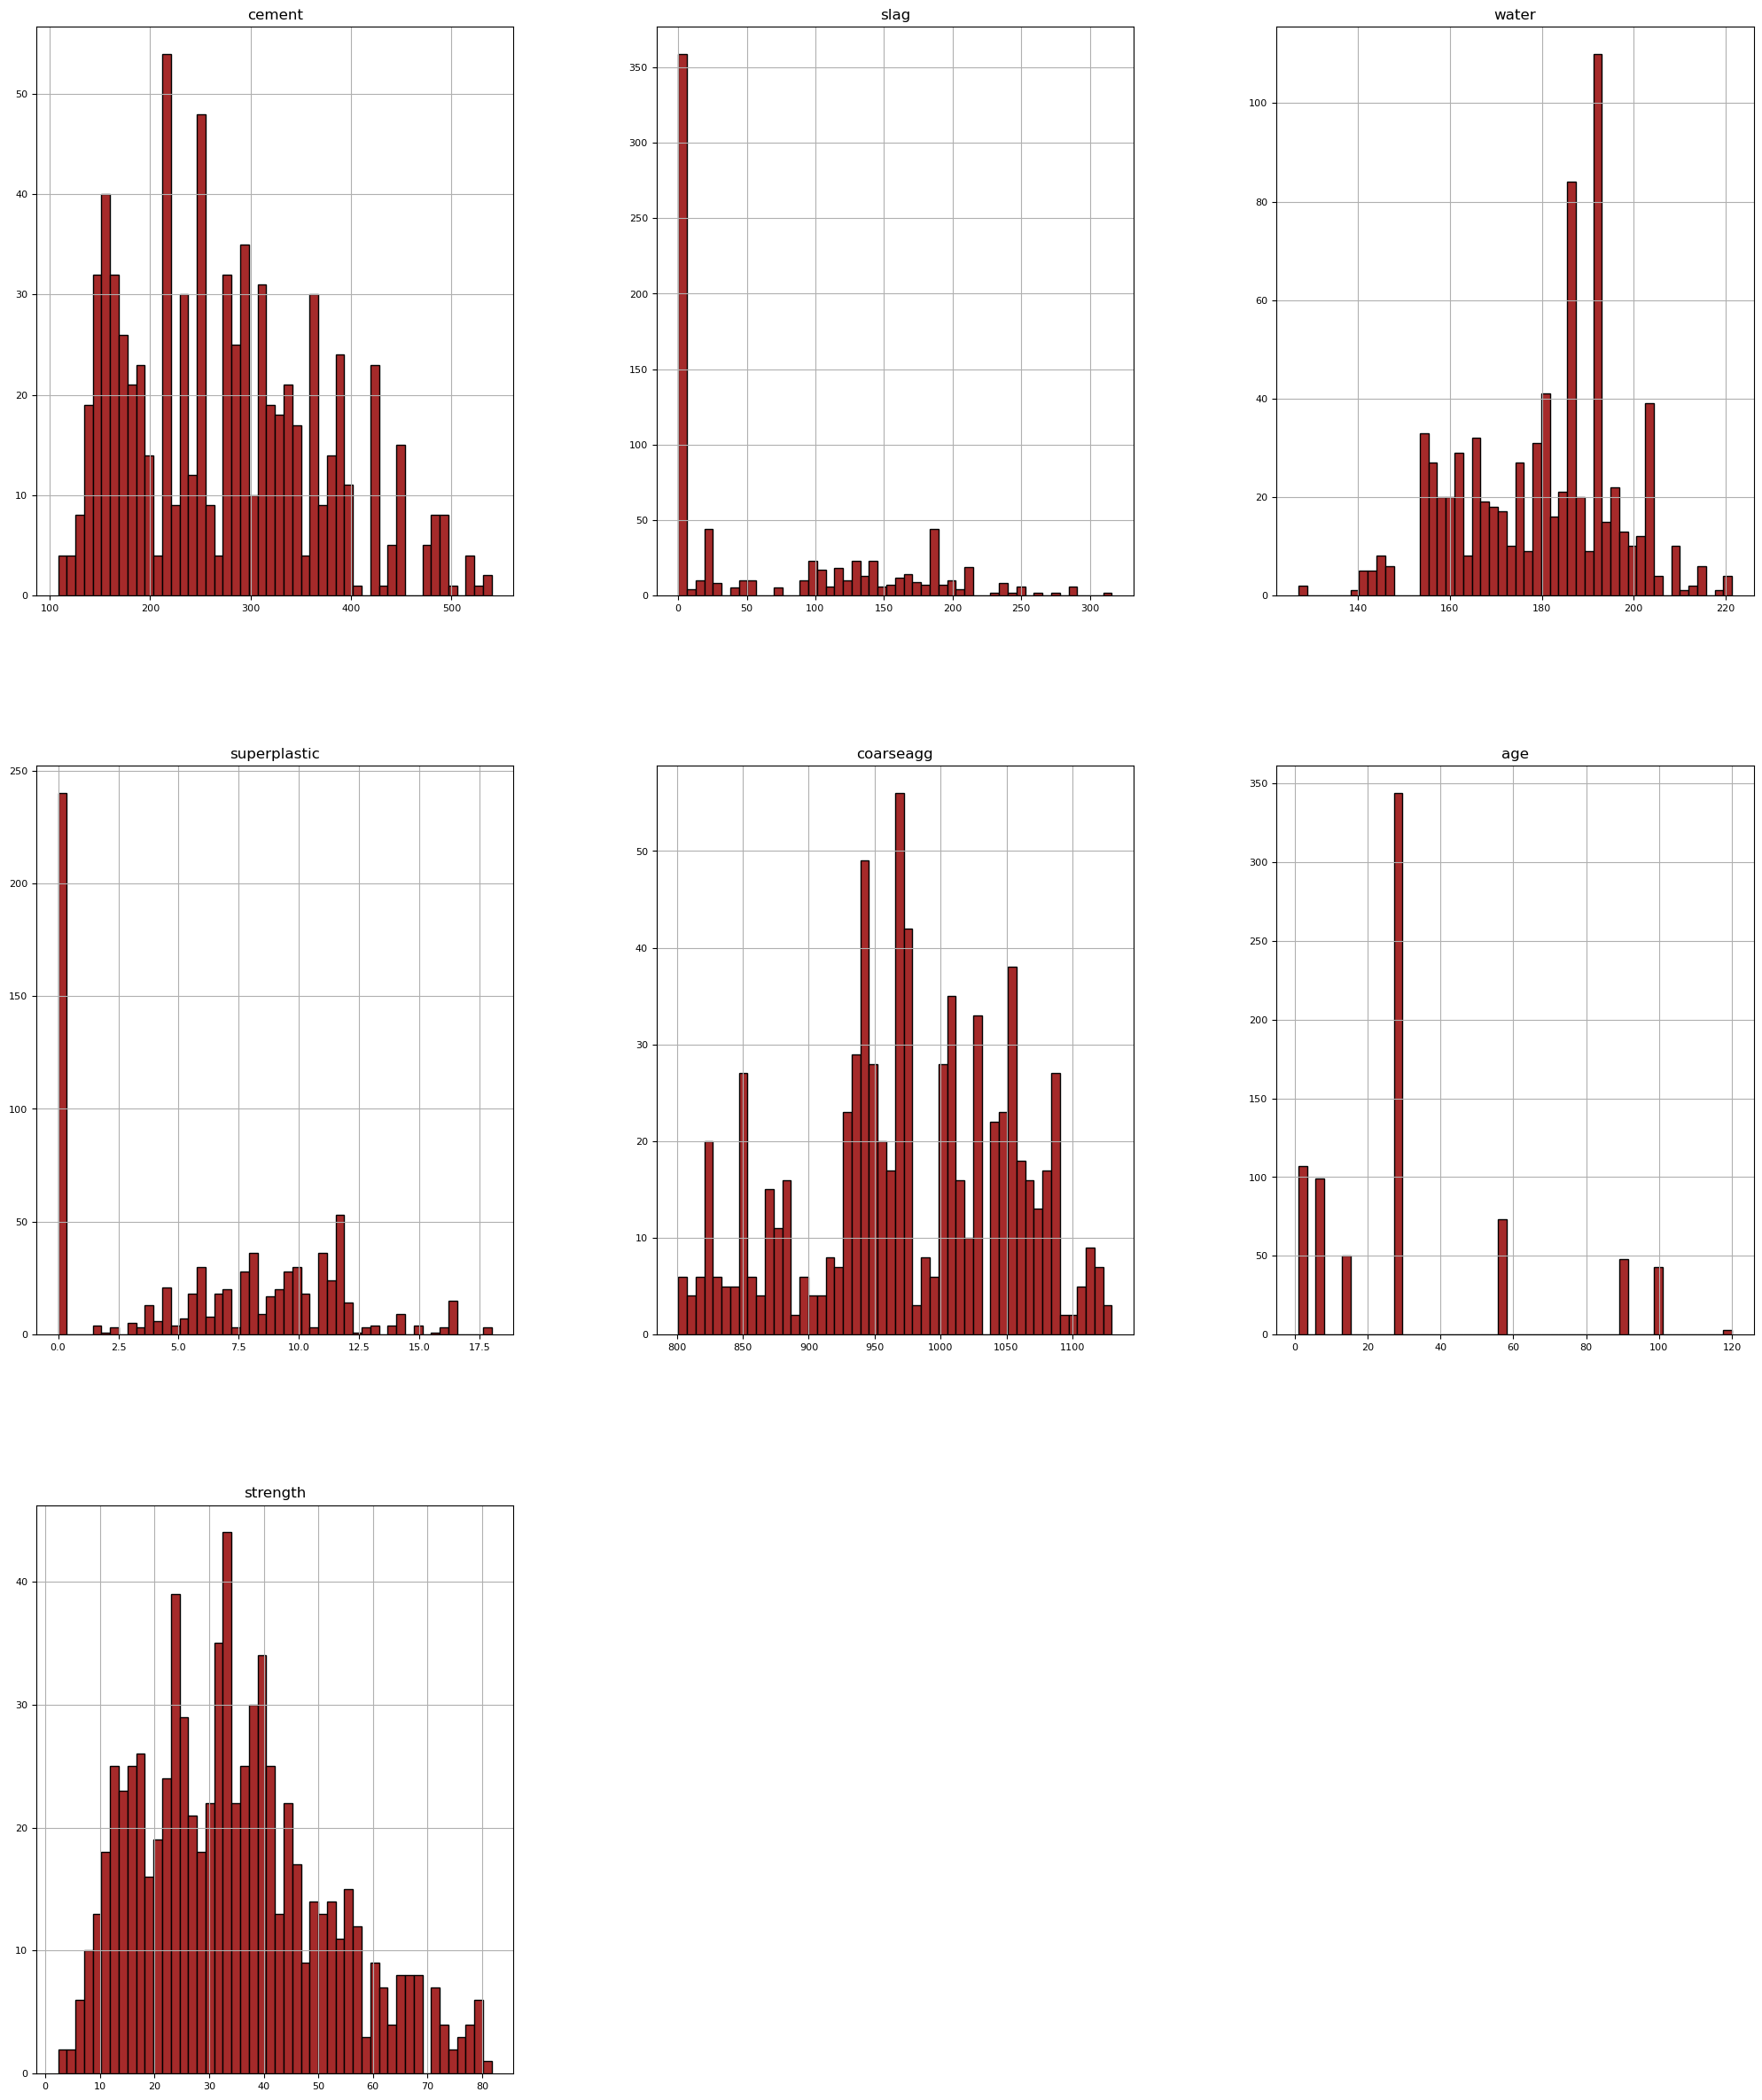

In [ ]:
fig_ = df.hist(figsize=(25, 30), bins=50, color="brown", edgecolor="black", xlabelsize=8, ylabelsize=8)

1. cement:
        The distribution appears to be roughly normal with a slight left skew.
        

2. slag:
        The distribution is highly right-skewed.
        There is a large concentration of values at the lower end , and fewer values spread across higher values.

3. water:
        The distribution is somewhat bimodal.
        Values are spread more evenly compared to slag, but there is a noticeable dip between the two peaks.

4. superplastic:
        The distribution is highly right-skewed, similar to slag, with a long tail extending towards higher values.

5. coarseagg:
        The distribution shows multiple peaks, making it multimodal.
        There is no single clear peak, with values spread out across.
6. age:
        The distribution is highly right-skewed.
        Most values are concentrated at the lower end, similar to the slag and superplastic variables, with a long tail extending towards higher values.

7. strength:
        The distribution is approximately normal, centered.
        

In summary, the variables exhibit a range of distributions, with some showing normal or near-normal distributions (cement, strength), and others showing significant skewness (slag, superplastic, age). The coarseagg variable is more complex with a multimodal distribution.

## 6. Feature Engineering

Feature engineering is a crucial step in the machine learning pipeline, involving the creation of new features or the transformation of existing ones to improve model performance. Based on the histograms and general feature distributions provided, here are some potential feature engineering methods:

In [ ]:
df

,cement,slag,water,superplastic,coarseagg,age,strength
0,540.0,0.0,162.0,2.5,1040.0,28,79.99
1,540.0,0.0,162.0,2.5,1055.0,28,61.89
10,198.6,132.4,192.0,0.0,978.4,90,38.07
11,198.6,132.4,192.0,0.0,978.4,28,28.02
16,139.6,209.4,192.0,0.0,1047.0,90,39.36
...,...,...,...,...,...,...,...
1025,276.4,116.0,179.6,8.9,870.1,28,44.28
1026,322.2,0.0,196.0,10.4,817.9,28,31.18
1027,148.5,139.4,192.7,6.1,892.4,28,23.70
1028,159.1,186.7,175.6,11.3,989.6,28,32.77


In [ ]:
# Splitting the input dataset in X and the output dataset into y
X = df.drop(columns = ['strength'])
y = df['strength']

In [ ]:
# Splitting the training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)

In [ ]:
from sklearn.preprocessing import StandardScaler
# Scaling the data
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [ ]:
x_train

array([[-1.03933444,  1.0520567 ,  0.35061938, -1.24421163,  0.64991229,
        -0.88906248],
       [-1.19595325,  1.38712718,  0.78944766,  0.56905854,  0.9108169 ,
        -0.12931067],
       [ 0.24534926, -0.84261454,  0.35061938, -1.24421163,  1.47866812,
        -0.12931067],
       ...,
       [-0.90011772,  0.65119056,  1.42063903, -1.24421163, -0.2120961 ,
        -0.12931067],
       [ 0.60567489, -0.84261454,  0.7293342 , -1.24421163,  0.62944918,
        -0.88906248],
       [-0.91956711, -0.29188052, -0.58113931,  0.40787897,  1.06940598,
        -1.03377712]])

In [ ]:
x_test

array([[-2.09152381e-01, -8.42614544e-01,  5.18937077e-01,
        -7.56597414e-02,  6.72933281e-01,  2.47555270e+00],
       [ 6.05674891e-01, -8.42614544e-01,  7.29334200e-01,
        -1.24421163e+00,  2.83454091e-02, -8.89062485e-01],
       [ 5.50397664e-01,  1.18486645e+00, -3.52708149e-01,
         5.48911095e-01, -1.20455679e+00, -1.29310668e-01],
       [ 6.05674891e-01,  1.22873022e+00,  9.09674592e-01,
         3.67584078e-01, -2.10749139e+00, -1.29310668e-01],
       [ 4.21417467e-01,  9.24120698e-01, -1.12254294e-01,
         3.67584078e-01,  3.35292015e-01, -1.29310668e-01],
       [ 8.00168838e-01, -8.42614544e-01,  1.39058230e+00,
        -1.24421163e+00, -2.28123585e-02, -6.35811879e-01],
       [ 3.08815709e-01, -8.42614544e-01,  1.39058230e+00,
        -1.24421163e+00, -2.28123585e-02, -1.29310668e-01],
       [-1.19800055e+00, -8.42614544e-01,  8.07481703e-01,
         5.89205987e-01, -1.26083033e+00, -1.29310668e-01],
       [ 1.90072036e-01, -8.42614544e-01, -7.073

## 7. Model Selection

### 7.1 Regression Models


In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

In [ ]:
#creating different models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'Neural Network Regressor': MLPRegressor(random_state=42)
}

NameError: name 'LinearRegression' is not defined

In [ ]:
#function to evaluate regression models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def model_evaluation(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2

In [ ]:
# Evaluating each model
results = {}
for model_name, model in models.items():
    mae, rmse, r2 = model_evaluation(model, X_train, y_train, X_test, y_test)
    results[model_name] = {'MAE': mae, 'RMSE': rmse, 'R2 Score': r2}

results_df = pd.DataFrame(results).T
print("Model Performance:")
print(results_df)

Model Performance:
                                MAE       RMSE  R2 Score
Linear Regression          5.725963   7.684060  0.779658
Lasso Regression           5.748303   7.681652  0.779796
Ridge Regression           5.725983   7.684052  0.779658
Decision Tree              4.305682   7.209902  0.806012
Random Forest              3.233607   4.622388  0.920265
Gradient Boosting          3.479645   4.429865  0.926769
Support Vector Regressor  11.814067  14.793193  0.183343
Neural Network Regressor   5.998462   7.858317  0.769551


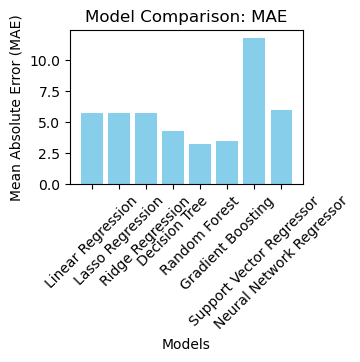

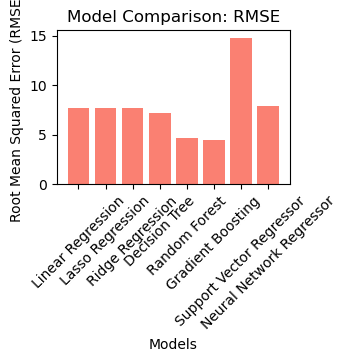

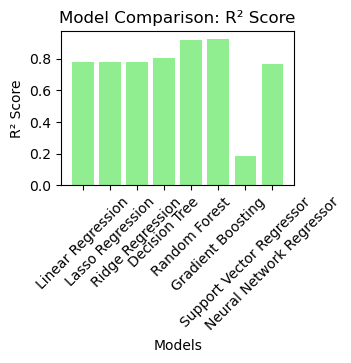

In [ ]:
# Data for plotting
model_names = results_df.index
mae_values = results_df['MAE']
rmse_values = results_df['RMSE']
r2_scores = results_df['R2 Score']

# Plot MAE Comparison
plt.figure(figsize=(3, 2))
plt.bar(model_names, mae_values, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Model Comparison: MAE')
plt.xticks(rotation=45)
plt.show()

# Plot RMSE Comparison
plt.figure(figsize=(3, 2))
plt.bar(model_names, rmse_values, color='salmon')
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Model Comparison: RMSE')
plt.xticks(rotation=45)
plt.show()

# Plot R2 Score Comparison
plt.figure(figsize=(3, 2))
plt.bar(model_names, r2_scores, color='lightgreen')
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.title('Model Comparison: R² Score')
plt.xticks(rotation=45)
plt.show()

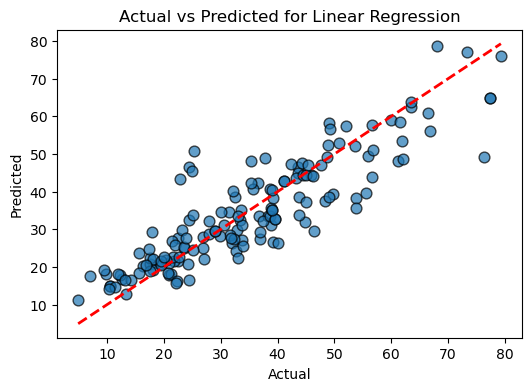

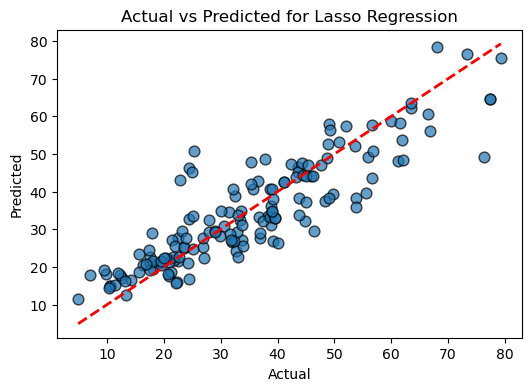

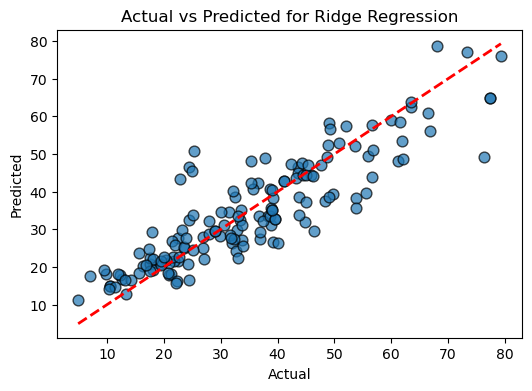

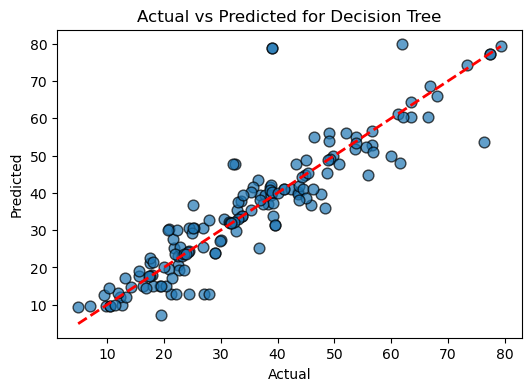

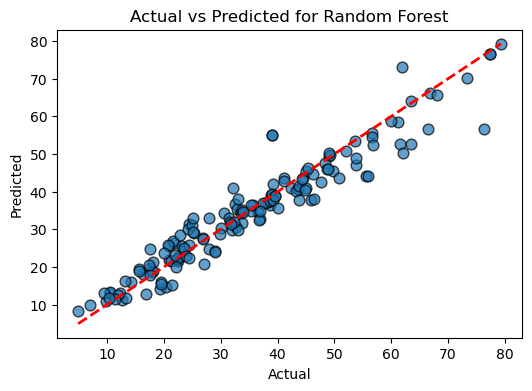

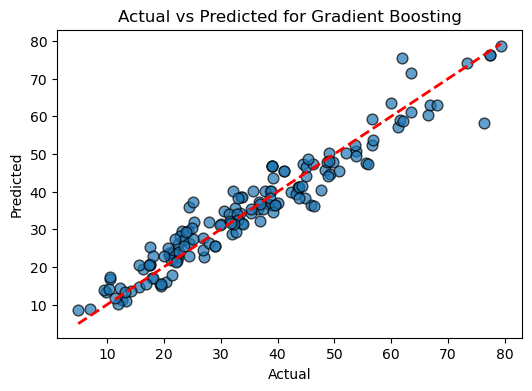

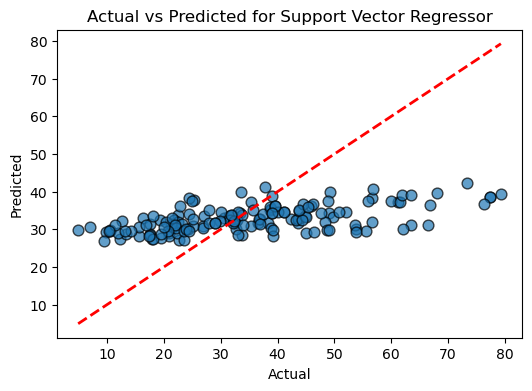

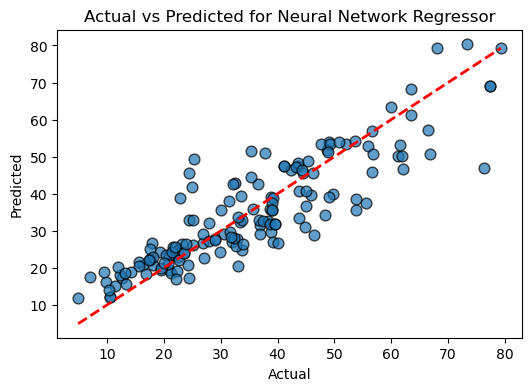

In [ ]:
def plotting_actual_vs_predicted(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7, s=60)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted for {model_name}')
    plt.show()

# Plot actual vs predicted for each model
for model_name, model in models.items():
    plotting_actual_vs_predicted(model, X_test, y_test, model_name)

In [ ]:
# Retraining the best model on the entire dataset
best_model_name = results_df['R2 Score'].idxmax()
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")
best_model.fit(X_train, y_train)


Best Model: Gradient Boosting


GradientBoostingRegressor(random_state=42)